# 0. Importación de Librerías.

In [1]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 48.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=348dcd813446a18c109f5d3fd90801ea345dbddcf262944aca5e2fabb004f773
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.2.1:
      Successfully uninstalled pydantic-2.2.1


In [55]:
!pip install plotly

In [171]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:


In [56]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from pandas_profiling import ProfileReport

#Scikit Learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Plotly
import plotly.express as px
import plotly.graph_objects as go

In [3]:
url = "https://raw.githubusercontent.com/fcastellanosp/MISIS-4822_202320_VISUAL/main/Laboratorio_1/historico_siniestros_bogota_2017.csv"

In [4]:
data = pd.read_csv(url)
original_data = data.copy()

In [5]:
print("La información tiene un total de {0} dato(s)".format(data.shape[0]))

La información tiene un total de 183215 dato(s)


A continuación una vista preliminar de los datos

In [6]:
data.head()

,Unnamed: 0,X,Y,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,...,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,MUNICIPIO,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA
0,0,-74.090924,4.693807,1,A000640275,4484660,2017-06-12 00:00:00+00:00,05:30:00,2017,JUNIO,...,AV AVENIDA BOYACA-CL 79 02,SOLO DANOS,CHOQUE,ENGATIVA,BOGOTA DC,2017/06/12 05:29:59+00,4.693807,-74.090924,10006772.0,221236.0
1,1,-74.119697,4.717638,2,A001515603,10583520,2022-10-29 00:00:00+00:00,10:55:00,2022,OCTUBRE,...,KR 111 A - CL 79 02,SOLO DANOS,CHOQUE,ENGATIVA,BOGOTA DC,2022/10/29 10:55:00+00,4.717638,-74.119697,10000591.0,NaN
2,3,-74.066101,4.737015,4,A001516620,10583513,2022-11-01 00:00:00+00:00,14:58:00,2022,NOVIEMBRE,...,KR 72 - CL 148 02,CON HERIDOS,CHOQUE,SUBA,BOGOTA DC,2022/11/01 14:58:00+00,4.737015,-74.066101,11005846.0,NaN
3,8,-74.052819,4.719787,9,A001516215,10583514,2022-11-03 00:00:00+00:00,23:46:00,2022,NOVIEMBRE,...,CL 134 A - KR 45 A 02,SOLO DANOS,CHOQUE,SUBA,BOGOTA DC,2022/11/03 23:45:59+00,4.719787,-74.052819,11009260.0,NaN
4,11,-74.062566,4.741401,12,A001516605,10583512,2022-11-02 00:00:00+00:00,06:56:00,2022,NOVIEMBRE,...,CL 153 - KR 58 C 02,CON HERIDOS,CHOQUE,SUBA,BOGOTA DC,2022/11/02 06:56:00+00,4.741401,-74.062566,0.0,NaN


Tipos de datos

In [23]:
data.dtypes

Unnamed: 0                int64
X                       float64
Y                       float64
OBJECTID                  int64
FORMULARIO               object
CODIGO_ACCIDENTE          int64
FECHA_OCURRENCIA_ACC     object
HORA_OCURRENCIA_ACC      object
ANO_OCURRENCIA_ACC        int64
MES_OCURRENCIA_ACC       object
DIA_OCURRENCIA_ACC       object
DIRECCION                object
GRAVEDAD                 object
CLASE_ACC                object
LOCALIDAD                object
MUNICIPIO                object
FECHA_HORA_ACC           object
LATITUD                 float64
LONGITUD                float64
CIV                     float64
PK_CALZADA              float64
dtype: object

Perfilamiento de datos

In [7]:
ProfileReport(data)

Output hidden; open in https://colab.research.google.com to view.

Confirmando los valores únicos

In [36]:
data[["GRAVEDAD"]].value_counts()

GRAVEDAD   
SOLO DANOS     108487
CON HERIDOS     71503
CON MUERTOS      3225
dtype: int64

In [10]:
new_values = {'SOLO DANOS': 1, 'CON HERIDOS': 3, 'CON MUERTOS': 5}

In [37]:
encoder = OneHotEncoder(sparse=False)

In [38]:
encoded_data = encoder.fit_transform(data[['GRAVEDAD']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [39]:
encoder.get_feature_names_out(['GRAVEDAD'])

array(['GRAVEDAD_CON HERIDOS', 'GRAVEDAD_CON MUERTOS',
       'GRAVEDAD_SOLO DANOS'], dtype=object)

In [40]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['GRAVEDAD']))
encoded_df

,GRAVEDAD_CON HERIDOS,GRAVEDAD_CON MUERTOS,GRAVEDAD_SOLO DANOS
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
...,...,...,...
183210,0.0,1.0,0.0
183211,1.0,0.0,0.0
183212,1.0,0.0,0.0
183213,1.0,0.0,0.0


In [44]:
for category in new_values:
  print(category)
  print(new_values[category])
  encoded_df["GRAVEDAD_" + category] *= new_values[category]

SOLO DANOS
1
CON HERIDOS
3
CON MUERTOS
5


In [46]:
encoded_df

,GRAVEDAD_CON HERIDOS,GRAVEDAD_CON MUERTOS,GRAVEDAD_SOLO DANOS
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,3.0,0.0,0.0
3,0.0,0.0,1.0
4,3.0,0.0,0.0
...,...,...,...
183210,0.0,5.0,0.0
183211,3.0,0.0,0.0
183212,3.0,0.0,0.0
183213,3.0,0.0,0.0


In [47]:
encoded_df["GRAVEDAD_NUM"] = encoded_df["GRAVEDAD_CON HERIDOS"] + encoded_df["GRAVEDAD_CON MUERTOS"] + encoded_df["GRAVEDAD_SOLO DANOS"]

In [48]:
encoded_df

,GRAVEDAD_CON HERIDOS,GRAVEDAD_CON MUERTOS,GRAVEDAD_SOLO DANOS,GRAVEDAD_NUM
0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0
2,3.0,0.0,0.0,3.0
3,0.0,0.0,1.0,1.0
4,3.0,0.0,0.0,3.0
...,...,...,...,...
183210,0.0,5.0,0.0,5.0
183211,3.0,0.0,0.0,3.0
183212,3.0,0.0,0.0,3.0
183213,3.0,0.0,0.0,3.0


In [49]:
data["GRAVEDAD_NUM"] = encoded_df["GRAVEDAD_NUM"]
data

,Unnamed: 0,X,Y,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,...,GRAVEDAD,CLASE_ACC,LOCALIDAD,MUNICIPIO,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA,GRAVEDAD_NUM
0,0,-74.090924,4.693807,1,A000640275,4484660,2017-06-12 00:00:00+00:00,05:30:00,2017,JUNIO,...,SOLO DANOS,CHOQUE,ENGATIVA,BOGOTA DC,2017/06/12 05:29:59+00,4.693807,-74.090924,10006772.0,221236.0,1.0
1,1,-74.119697,4.717638,2,A001515603,10583520,2022-10-29 00:00:00+00:00,10:55:00,2022,OCTUBRE,...,SOLO DANOS,CHOQUE,ENGATIVA,BOGOTA DC,2022/10/29 10:55:00+00,4.717638,-74.119697,10000591.0,NaN,1.0
2,3,-74.066101,4.737015,4,A001516620,10583513,2022-11-01 00:00:00+00:00,14:58:00,2022,NOVIEMBRE,...,CON HERIDOS,CHOQUE,SUBA,BOGOTA DC,2022/11/01 14:58:00+00,4.737015,-74.066101,11005846.0,NaN,3.0
3,8,-74.052819,4.719787,9,A001516215,10583514,2022-11-03 00:00:00+00:00,23:46:00,2022,NOVIEMBRE,...,SOLO DANOS,CHOQUE,SUBA,BOGOTA DC,2022/11/03 23:45:59+00,4.719787,-74.052819,11009260.0,NaN,1.0
4,11,-74.062566,4.741401,12,A001516605,10583512,2022-11-02 00:00:00+00:00,06:56:00,2022,NOVIEMBRE,...,CON HERIDOS,CHOQUE,SUBA,BOGOTA DC,2022/11/02 06:56:00+00,4.741401,-74.062566,0.0,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183210,465852,-74.047215,4.749461,465853,A001570976,10591244,2023-05-22 00:00:00+00:00,01:00:00,2023,MAYO,...,CON MUERTOS,CAIDA DE OCUPANTE,SUBA,BOGOTA DC,2023/05/22 00:59:59+00,4.749461,-74.047215,1001376.0,NaN,5.0
183211,465853,-74.052615,4.682328,465854,A001570771,10591506,2023-05-19 00:00:00+00:00,16:40:00,2023,MAYO,...,CON HERIDOS,ATROPELLO,CHAPINERO,BOGOTA DC,2023/05/19 16:40:00+00,4.682328,-74.052615,2000085.0,NaN,3.0
183212,465854,-74.046419,4.666114,465855,A001514319,10591498,2023-05-18 00:00:00+00:00,11:37:00,2023,MAYO,...,CON HERIDOS,CHOQUE,CHAPINERO,BOGOTA DC,2023/05/18 11:37:00+00,4.666114,-74.046419,2002268.0,NaN,3.0
183213,465855,-74.069466,4.659057,465856,A001571169,10591495,2023-05-25 00:00:00+00:00,14:34:00,2023,MAYO,...,CON HERIDOS,CHOQUE,BARRIOS UNIDOS,BOGOTA DC,2023/05/25 14:34:00+00,4.659057,-74.069466,12002307.0,NaN,3.0


In [50]:
drop_fields = ["Unnamed: 0", "X", "Y", "OBJECTID", "FORMULARIO", "DIRECCION", "MUNICIPIO", "CIV", "PK_CALZADA"]

In [53]:
data = data.drop(drop_fields, axis=1)
data

,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,GRAVEDAD,CLASE_ACC,LOCALIDAD,FECHA_HORA_ACC,LATITUD,LONGITUD,GRAVEDAD_NUM
0,4484660,2017-06-12 00:00:00+00:00,05:30:00,2017,JUNIO,LUNES,SOLO DANOS,CHOQUE,ENGATIVA,2017/06/12 05:29:59+00,4.693807,-74.090924,1.0
1,10583520,2022-10-29 00:00:00+00:00,10:55:00,2022,OCTUBRE,SABADO,SOLO DANOS,CHOQUE,ENGATIVA,2022/10/29 10:55:00+00,4.717638,-74.119697,1.0
2,10583513,2022-11-01 00:00:00+00:00,14:58:00,2022,NOVIEMBRE,MARTES,CON HERIDOS,CHOQUE,SUBA,2022/11/01 14:58:00+00,4.737015,-74.066101,3.0
3,10583514,2022-11-03 00:00:00+00:00,23:46:00,2022,NOVIEMBRE,JUEVES,SOLO DANOS,CHOQUE,SUBA,2022/11/03 23:45:59+00,4.719787,-74.052819,1.0
4,10583512,2022-11-02 00:00:00+00:00,06:56:00,2022,NOVIEMBRE,MIERCOLES,CON HERIDOS,CHOQUE,SUBA,2022/11/02 06:56:00+00,4.741401,-74.062566,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183210,10591244,2023-05-22 00:00:00+00:00,01:00:00,2023,MAYO,LUNES,CON MUERTOS,CAIDA DE OCUPANTE,SUBA,2023/05/22 00:59:59+00,4.749461,-74.047215,5.0
183211,10591506,2023-05-19 00:00:00+00:00,16:40:00,2023,MAYO,VIERNES,CON HERIDOS,ATROPELLO,CHAPINERO,2023/05/19 16:40:00+00,4.682328,-74.052615,3.0
183212,10591498,2023-05-18 00:00:00+00:00,11:37:00,2023,MAYO,JUEVES,CON HERIDOS,CHOQUE,CHAPINERO,2023/05/18 11:37:00+00,4.666114,-74.046419,3.0
183213,10591495,2023-05-25 00:00:00+00:00,14:34:00,2023,MAYO,JUEVES,CON HERIDOS,CHOQUE,BARRIOS UNIDOS,2023/05/25 14:34:00+00,4.659057,-74.069466,3.0


#1. Posibles gráficas

<Axes: xlabel='LONGITUD', ylabel='LATITUD'>

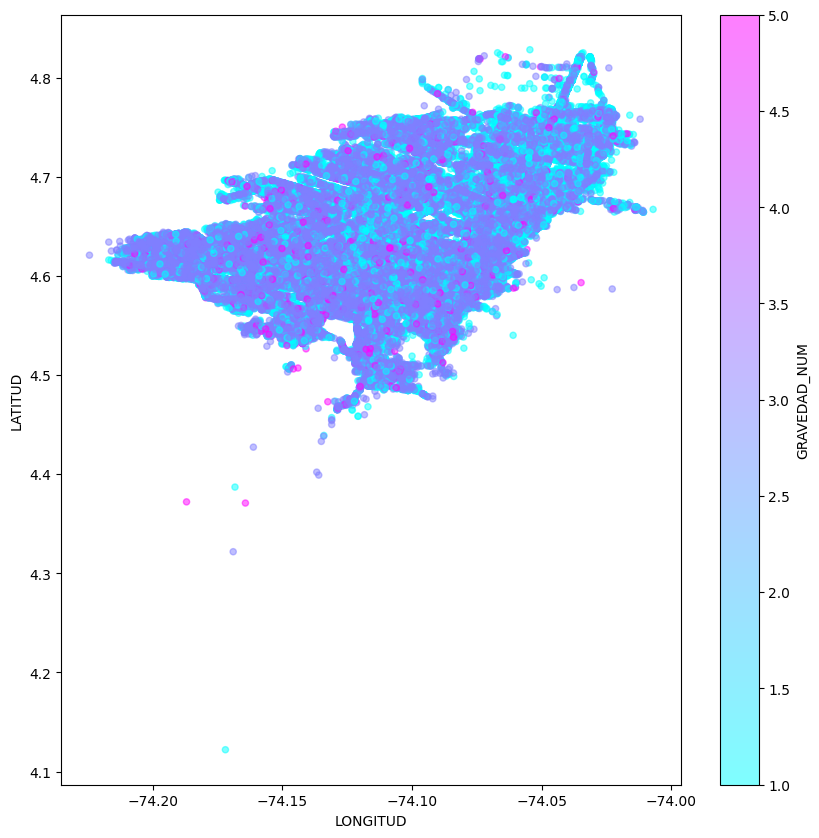

In [54]:
data.plot.scatter(x="LONGITUD", y="LATITUD", c="GRAVEDAD_NUM", figsize=(10, 10), cmap="cool", alpha=0.5)

In [78]:
#data_1 = data.groupby(["ANO_OCURRENCIA_ACC", "GRAVEDAD"]).count().reset_index()
data_1 = data.groupby(["ANO_OCURRENCIA_ACC", "GRAVEDAD"]).size().reset_index(name='TOTAL')
data_1

,ANO_OCURRENCIA_ACC,GRAVEDAD,TOTAL
0,2017,CON HERIDOS,9642
1,2017,CON MUERTOS,540
2,2017,SOLO DANOS,22233
3,2018,CON HERIDOS,11425
4,2018,CON MUERTOS,500
5,2018,SOLO DANOS,21483
6,2019,CON HERIDOS,11515
7,2019,CON MUERTOS,493
8,2019,SOLO DANOS,20620
9,2020,CON HERIDOS,8360


In [139]:
fig = px.bar(data_1, x="ANO_OCURRENCIA_ACC", y="TOTAL", color="GRAVEDAD", title="Gravedad de accidente")

fig.update_layout(title='Siniestros por año',
                   xaxis_title='Año',
                   yaxis_title='Cantidad',
                   legend_title="Leyenda")

fig.show()

In [140]:
fig = px.treemap(data[["GRAVEDAD", "GRAVEDAD_NUM", "CLASE_ACC", "DIA_OCURRENCIA_ACC"]], path=[px.Constant("TODOS"), 'GRAVEDAD', 'CLASE_ACC'],
                 values='GRAVEDAD_NUM', color='GRAVEDAD_NUM')

fig.update_traces(marker=dict(cornerradius=5))

fig.update_layout(title='Gravedad y clase de accidente',
                   legend_title="Leyenda")

fig.show()

In [141]:
fig = px.line(data_1, y="TOTAL", x="ANO_OCURRENCIA_ACC", color="GRAVEDAD",
              line_shape="spline", render_mode="svg",
             color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(title="Tendencia de eventos por gravedad",
                  xaxis_title='Localidad',
                   yaxis_title='Total',
                  legend_title="Leyenda")

fig.show()

In [108]:
data_2 = data.groupby(["ANO_OCURRENCIA_ACC", "LOCALIDAD", "GRAVEDAD"]).size().reset_index(name='TOTAL')
data_2

,ANO_OCURRENCIA_ACC,LOCALIDAD,GRAVEDAD,TOTAL
0,2017,ANTONIO NARINO,CON HERIDOS,224
1,2017,ANTONIO NARINO,CON MUERTOS,11
2,2017,ANTONIO NARINO,SOLO DANOS,315
3,2017,BARRIOS UNIDOS,CON HERIDOS,359
4,2017,BARRIOS UNIDOS,CON MUERTOS,27
...,...,...,...,...
398,2023,USAQUEN,CON MUERTOS,13
399,2023,USAQUEN,SOLO DANOS,38
400,2023,USME,CON HERIDOS,245
401,2023,USME,CON MUERTOS,15


In [142]:
fig = px.bar(x=data_2["LOCALIDAD"], y=data_2["TOTAL"], color=data_2["GRAVEDAD"])

fig.update_layout(title="Total de eventos por localidad",
                  xaxis_title='Localidad',
                   yaxis_title='Total',
                  legend_title="Leyenda")

fig.show()

In [143]:
fig = px.line(data_2, y="TOTAL", x="LOCALIDAD", color="ANO_OCURRENCIA_ACC", #line_group="country",
              line_shape="spline", render_mode="svg",
             color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(title="Total de eventos por localidad y año",
                  xaxis_title='Localidad',
                   yaxis_title='Total',
                  legend_title="Leyenda")

fig.show()

In [144]:
fig = px.line(data_2, y="TOTAL", x="LOCALIDAD", color="GRAVEDAD", #line_group="country",
              line_shape="spline", render_mode="svg",
             color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(title="Total de eventos por localidad y gravedad",
                  xaxis_title='Localidad',
                   yaxis_title='Total',
                  legend_title="Leyenda")

fig.show()

In [145]:
fig = px.bar(data_2, x="LOCALIDAD", y="TOTAL", color='ANO_OCURRENCIA_ACC')

fig.update_layout(title="Total de eventos por localidad y año de ocurrencia",
                  xaxis_title='Localidad',
                   yaxis_title='Total',
                  legend_title="Leyenda")

fig.show()

In [146]:
fig = px.bar(data_2, x="LOCALIDAD", y="TOTAL",
             color='GRAVEDAD', barmode='group',
             height=400)

fig.update_layout(title="Total de eventos por localidad y gravedad",
                  xaxis_title='Localidad',
                   yaxis_title='Total',
                  legend_title="Leyenda")

fig.show()

In [149]:
data_3 = data.groupby(["FECHA_OCURRENCIA_ACC", "GRAVEDAD", "LOCALIDAD"]).size().reset_index(name='TOTAL')
data_3

,FECHA_OCURRENCIA_ACC,GRAVEDAD,LOCALIDAD,TOTAL
0,2017-01-01 00:00:00+00:00,CON HERIDOS,BARRIOS UNIDOS,1
1,2017-01-01 00:00:00+00:00,CON HERIDOS,BOSA,3
2,2017-01-01 00:00:00+00:00,CON HERIDOS,CIUDAD BOLIVAR,2
3,2017-01-01 00:00:00+00:00,CON HERIDOS,ENGATIVA,1
4,2017-01-01 00:00:00+00:00,CON HERIDOS,FONTIBON,1
...,...,...,...,...
67344,2023-08-08 00:00:00+00:00,SOLO DANOS,CIUDAD BOLIVAR,1
67345,2023-08-10 00:00:00+00:00,CON MUERTOS,BARRIOS UNIDOS,1
67346,2023-08-10 00:00:00+00:00,CON MUERTOS,CIUDAD BOLIVAR,1
67347,2023-08-10 00:00:00+00:00,CON MUERTOS,ENGATIVA,1


In [155]:
fig = px.area(data_3, x="FECHA_OCURRENCIA_ACC", y="TOTAL", color="GRAVEDAD", line_group="LOCALIDAD")

fig.update_layout(title="Total de eventos por localidad y gravedad",
                  xaxis_title='Localidad',
                   yaxis_title='Total',
                  legend_title="Leyenda")

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [156]:
data_4 = data.groupby(["FECHA_OCURRENCIA_ACC", "DIA_OCURRENCIA_ACC"]).size().reset_index(name='TOTAL')
data_4

,FECHA_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,TOTAL
0,2017-01-01 00:00:00+00:00,DOMINGO,33
1,2017-01-02 00:00:00+00:00,LUNES,37
2,2017-01-03 00:00:00+00:00,MARTES,75
3,2017-01-04 00:00:00+00:00,MIERCOLES,50
4,2017-01-05 00:00:00+00:00,JUEVES,63
...,...,...,...
2407,2023-08-05 00:00:00+00:00,SABADO,18
2408,2023-08-06 00:00:00+00:00,DOMINGO,20
2409,2023-08-07 00:00:00+00:00,LUNES,2
2410,2023-08-08 00:00:00+00:00,MARTES,5


In [158]:
fig = px.line(data_4, x="FECHA_OCURRENCIA_ACC", y="TOTAL", color='DIA_OCURRENCIA_ACC')

fig.update_layout(title="Total de eventos por día de ocurrencia",
                  xaxis_title='Fecha',
                   yaxis_title='Total',
                  legend_title="Leyenda")

fig.show()

In [159]:
data_5 = data.groupby(["FECHA_OCURRENCIA_ACC", "MES_OCURRENCIA_ACC"]).size().reset_index(name='TOTAL')
data_5

,FECHA_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,TOTAL
0,2017-01-01 00:00:00+00:00,ENERO,33
1,2017-01-02 00:00:00+00:00,ENERO,37
2,2017-01-03 00:00:00+00:00,ENERO,75
3,2017-01-04 00:00:00+00:00,ENERO,50
4,2017-01-05 00:00:00+00:00,ENERO,63
...,...,...,...
2407,2023-08-05 00:00:00+00:00,AGOSTO,18
2408,2023-08-06 00:00:00+00:00,AGOSTO,20
2409,2023-08-07 00:00:00+00:00,AGOSTO,2
2410,2023-08-08 00:00:00+00:00,AGOSTO,5


In [161]:
fig = px.line(data_5, x="FECHA_OCURRENCIA_ACC", y="TOTAL", color='MES_OCURRENCIA_ACC')

fig.update_layout(title="Total de eventos por mes de ocurrencia",
                  xaxis_title='Fecha',
                   yaxis_title='Total',
                  legend_title="Leyenda")

fig.show()

In [167]:
data_6 = data.copy()
data_6["HORA"] = pd.DatetimeIndex(data_6["FECHA_HORA_ACC"]).hour

data_6 = data_6.groupby(["FECHA_OCURRENCIA_ACC", "HORA"]).size().reset_index(name='TOTAL')
data_6

,FECHA_OCURRENCIA_ACC,HORA,TOTAL
0,2017-01-01 00:00:00+00:00,0,1
1,2017-01-01 00:00:00+00:00,1,1
2,2017-01-01 00:00:00+00:00,2,1
3,2017-01-01 00:00:00+00:00,3,2
4,2017-01-01 00:00:00+00:00,4,1
...,...,...,...
48439,2023-08-08 00:00:00+00:00,12,1
48440,2023-08-08 00:00:00+00:00,15,1
48441,2023-08-10 00:00:00+00:00,6,1
48442,2023-08-10 00:00:00+00:00,12,2


In [169]:
fig = px.line(data_6, x="FECHA_OCURRENCIA_ACC", y="TOTAL", color='HORA')

fig.update_layout(title="Total de eventos por hora de ocurrencia",
                  xaxis_title='Fecha',
                   yaxis_title='Total',
                  legend_title="Leyenda")

fig.show()

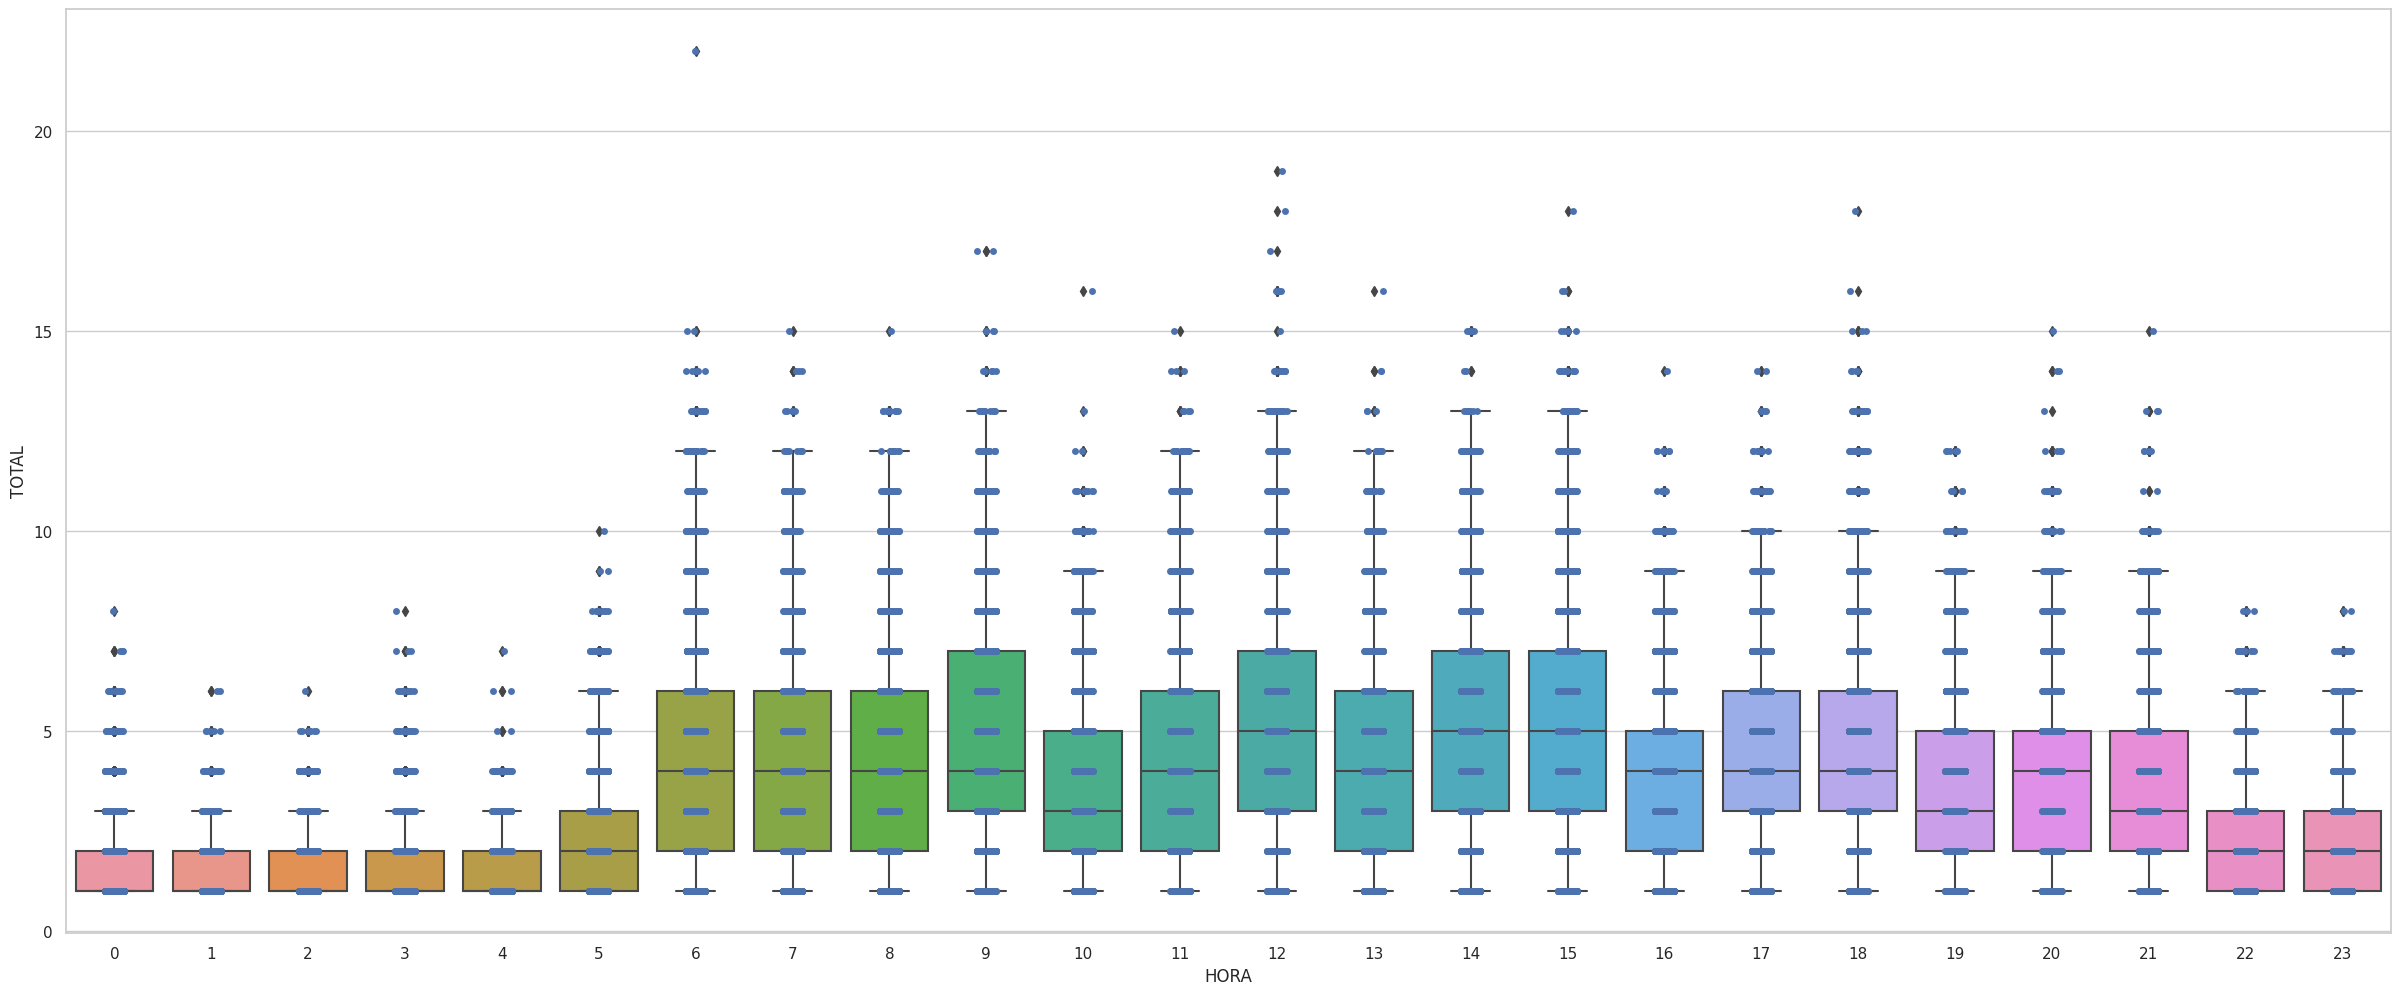

In [170]:
sns.set(rc={'figure.figsize':(30,12)})
sns.set_style('whitegrid')
ax= sns.boxplot(x='HORA',y='TOTAL',data=data_6)
ax = sns.stripplot(x="HORA", y="TOTAL",data=data_6)

In [174]:
!jupyter nbconvert --to PDF "/content/Visual_Laboratorio_1.ipynb"

[NbConvertApp] Converting notebook /content/Visual_Laboratorio_1.ipynb to PDF
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  warn(
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  warn(
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  warn(
[NbConvertApp] Support files will be in Visual_Laboratorio_1_files/
[NbConvertApp] Making directory ./Visual_Laboratorio_1_files
[NbConvertApp] Making directory ./Visual_Laboratorio_1_files
[NbConvertApp] Writing 119416 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp